<a href="https://colab.research.google.com/github/FreeMagic200/R_clustering/blob/main/HGC/02_HGC_compare_with_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# compare HGC clustering result(k=9) with seurat pbmc3k tutorial result

```
mamba env create --file HGC_conda_env.yml --name HGC_visualization

micromamba install -c conda-forge -c bioconda \
    r-base \
    r-biocmanager \
    r-seurat=5 \
    r-presto \
    r-seurat-data \
    r-dplyr \
    r-patchwork \
    r-remotes \
    r-devtools \
    r-irkernel \
    jupyterlab \
    python=3.9 \
    pip \
    zlib \
    liblzma \
    backports.lzma \
    r-r.utils \
    r-qs \
    r-ggplot2 \
    r-ggvenn \
    r-ggalluvial \
    r-pheatmap \
    r-mclustcomp \
    r-fossil \
    r-aricode \
    r-venndiagram \
    r-upsetr

```

In [60]:
# Initialization
library(dplyr)
library(Seurat)
library(patchwork)
library(qs)
library(ggvenn)
library(ggalluvial)
library(tidyr)
library(mclustcomp)
library(fossil)
library(aricode)
library(VennDiagram)
library(UpSetR)

In [2]:
pbmc_hgc <- qread("~/Colab_Notebooks/[02] R/[02] clustering/[01] hierarchical clustering/[01] HGC  fast hierarchical clustering for large-scale single-cell data/pbmc_clustered.qs")

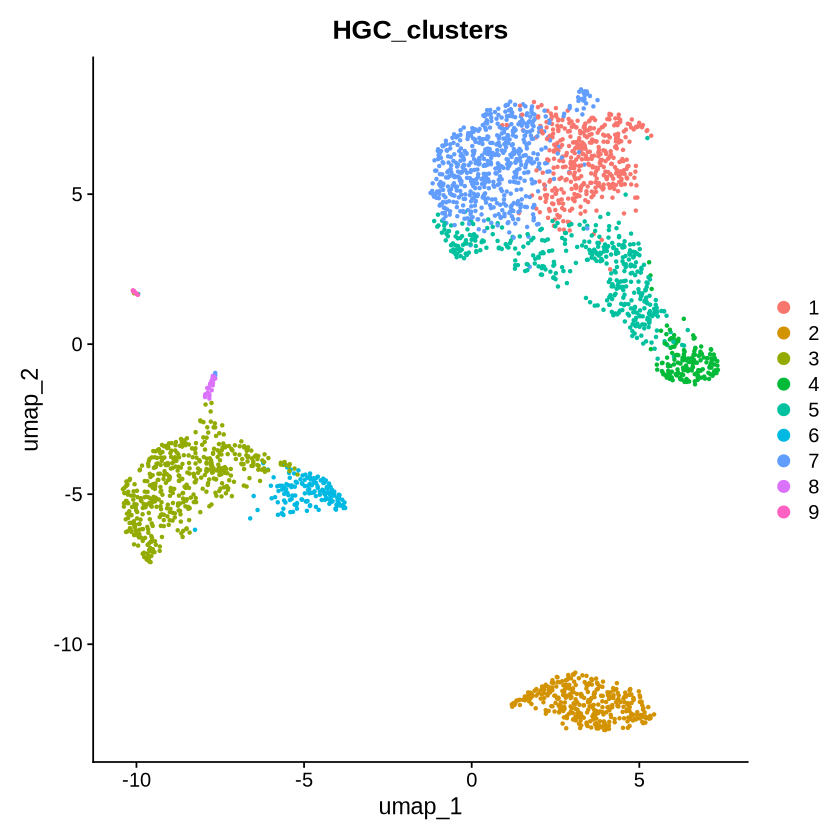

In [3]:
DimPlot(pbmc_hgc,group.by = "HGC_clusters")

In [4]:
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir =
                "~/Colab_Notebooks/[02] R/[03] datasets/[01] pbmc3k/filtered_gene_bc_matrices/hg19")

In [5]:
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 1 layer present: counts

In [6]:
# QC and cell selection
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
head(pbmc@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACATACAACCAC-1,pbmc3k,2419,779,3.0177759
AAACATTGAGCTAC-1,pbmc3k,4903,1352,3.7935958
AAACATTGATCAGC-1,pbmc3k,3147,1129,0.8897363
AAACCGTGCTTCCG-1,pbmc3k,2639,960,1.7430845
AAACCGTGTATGCG-1,pbmc3k,980,521,1.2244898


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


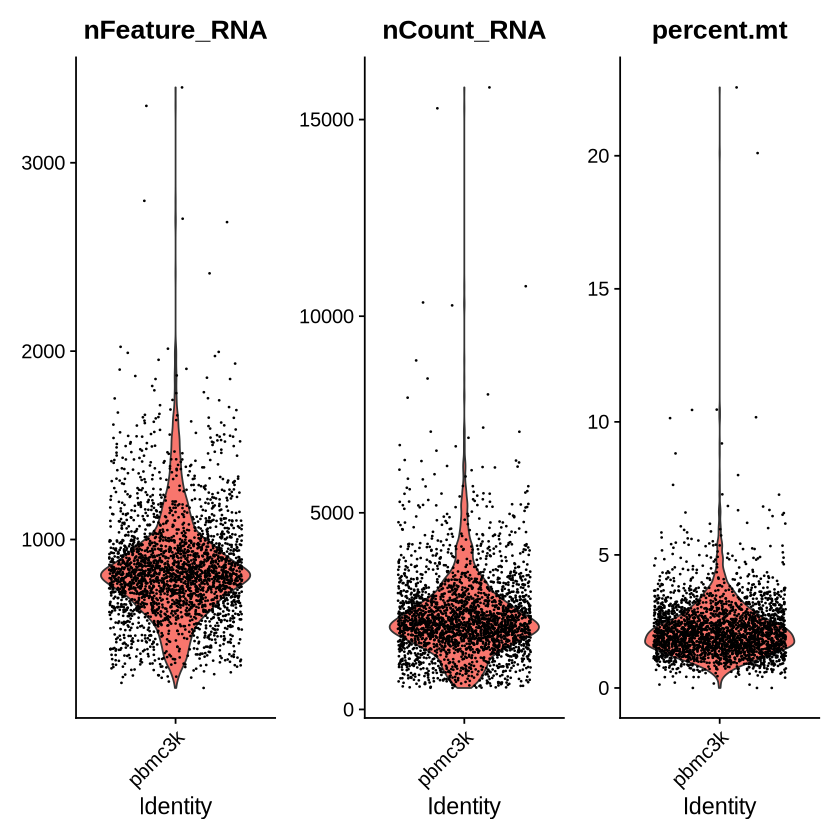

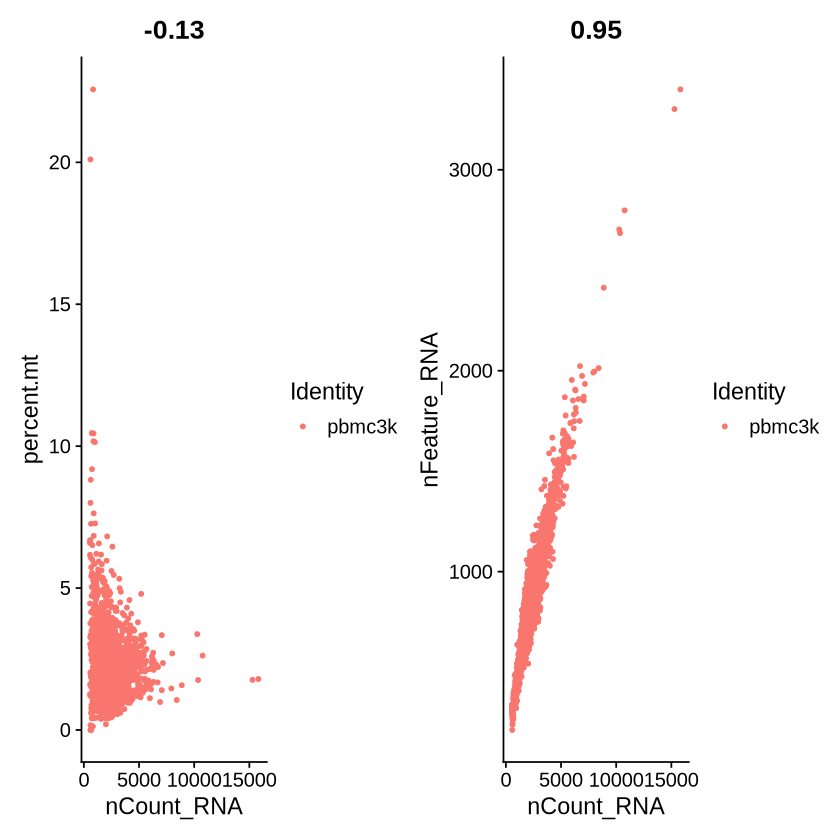

In [7]:
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [8]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)


In [9]:
# Normalization
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 1e4)
# Or: pbmc <- NormalizeData(pbmc)


Normalizing layer: counts



Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


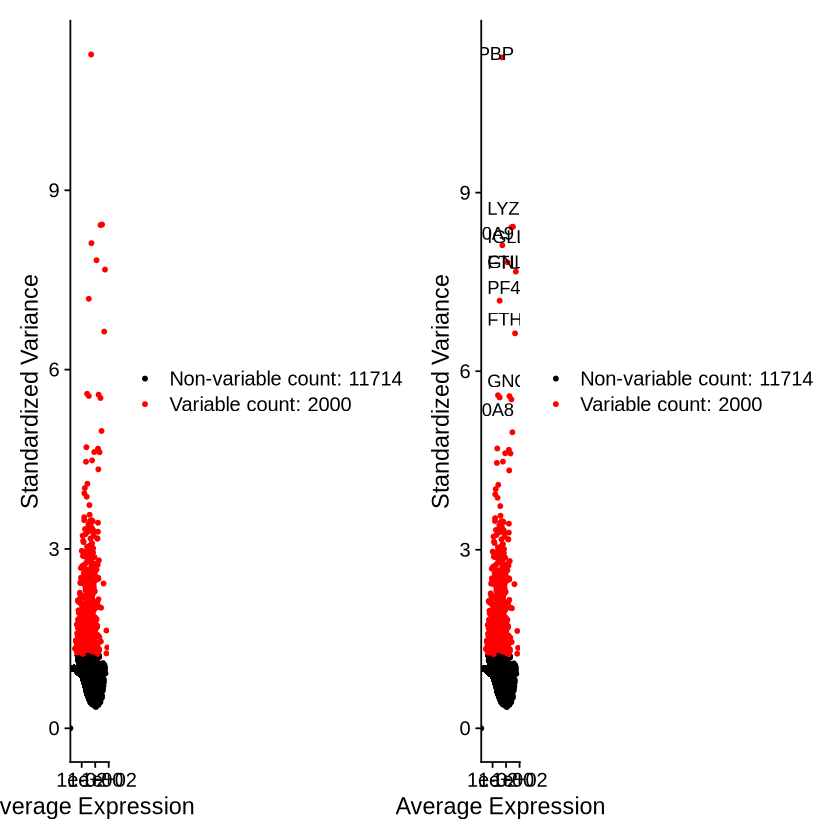

In [10]:
# Variable feature selection
pbmc <- FindVariableFeatures(pbmc, selection.method = 'vst', nfeatures = 2000)
top10 <- head(VariableFeatures(pbmc), 10)
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [11]:
# Scaling
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)


Centering and scaling data matrix



PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


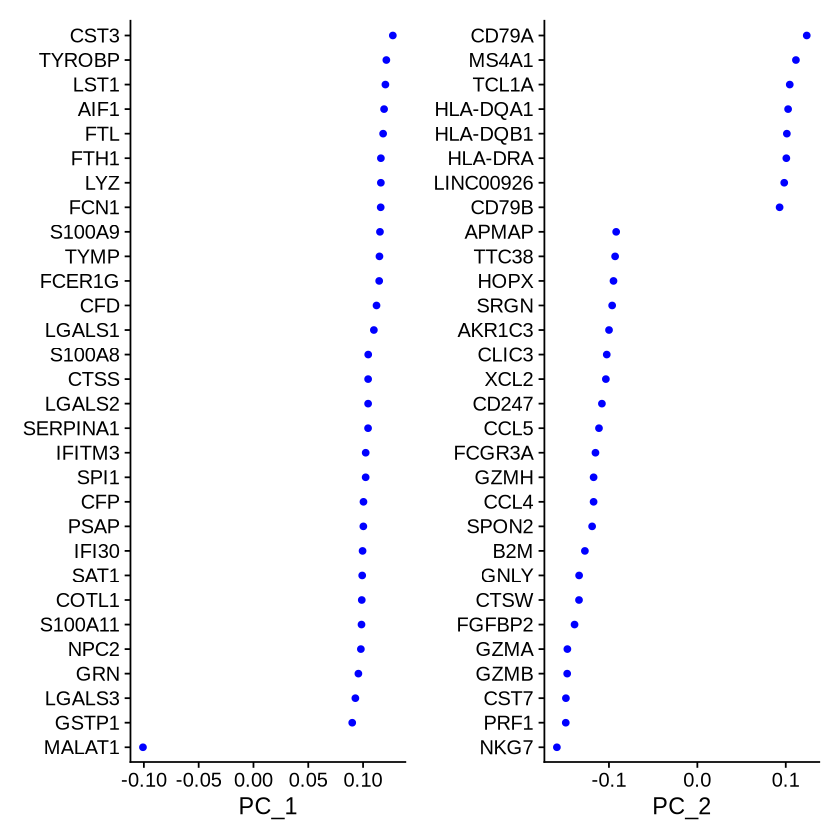

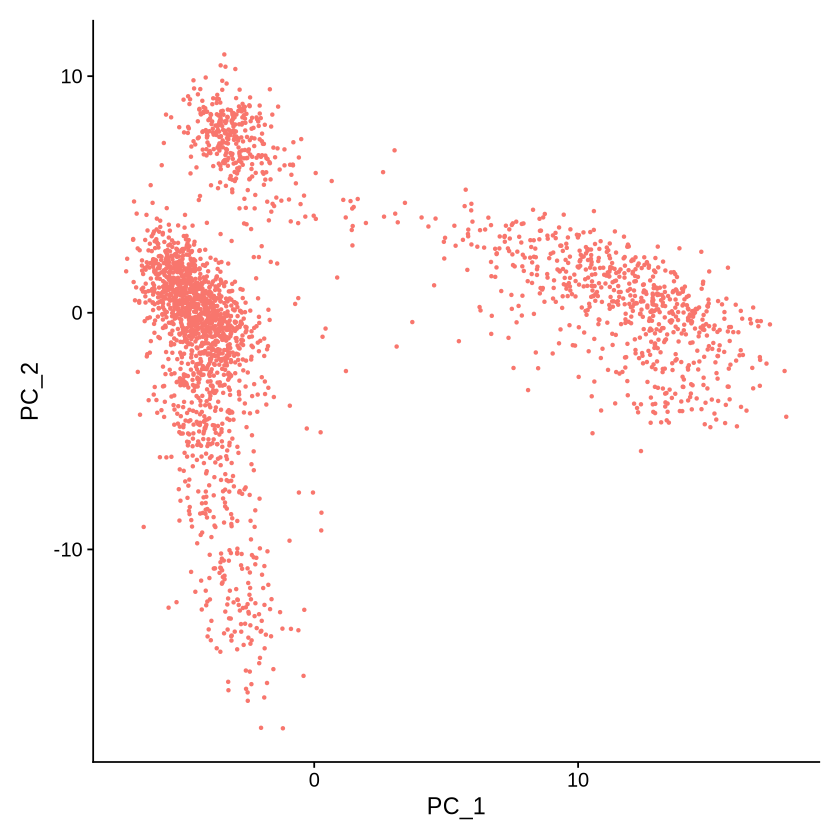

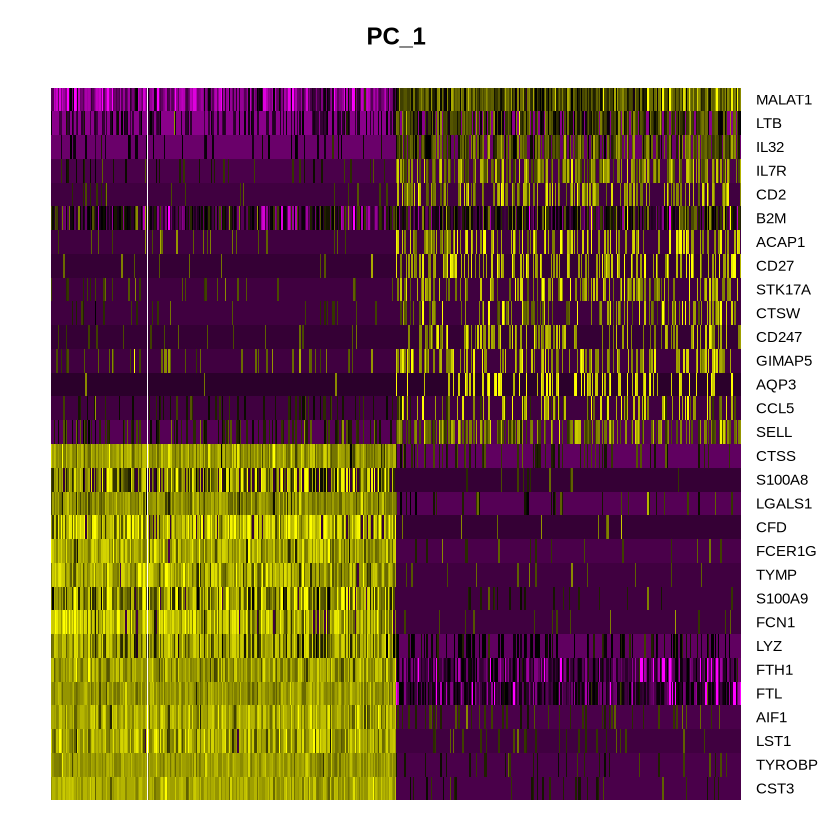

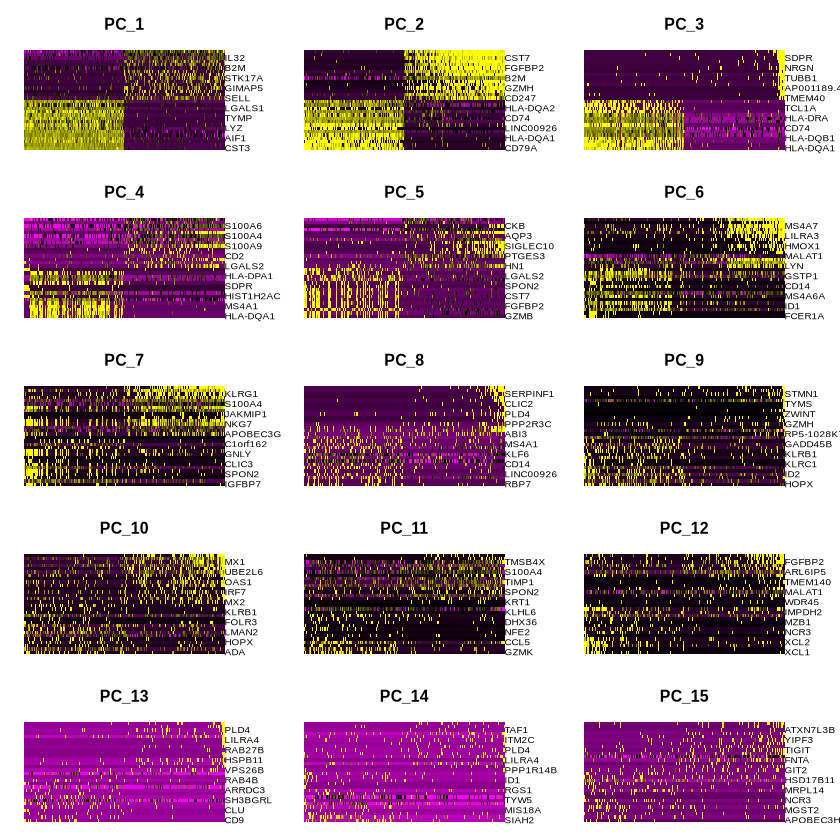

In [12]:
# PCA
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
print(pbmc[['pca']], dims = 1:5, nfeatures = 5)
VizDimLoadings(pbmc, dims = 1:2, reduction = 'pca')
DimPlot(pbmc, reduction = 'pca') + NoLegend()
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

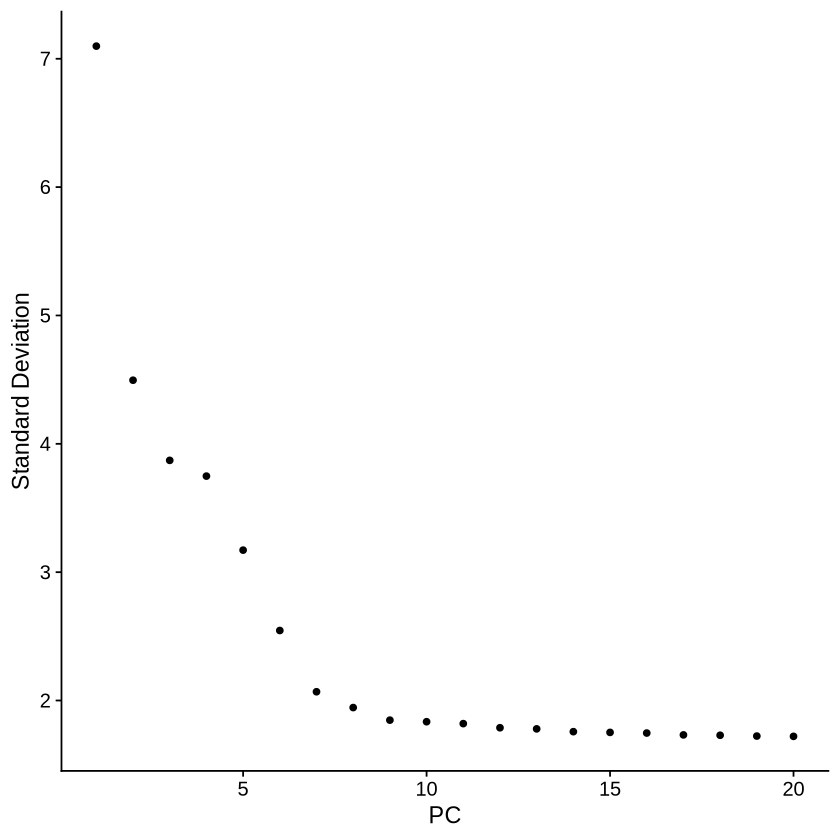

In [13]:
# Dimensionality determination
ElbowPlot(pbmc)


In [14]:
# Clustering
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)
head(Idents(pbmc), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 9
Elapsed time: 0 seconds


AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1 AAACCGTGCTTCCG-1 
               2                3                2                1 
AAACCGTGTATGCG-1 
               6 
Levels: 0 1 2 3 4 5 6 7 8

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:17:11 UMAP embedding parameters a = 0.9922 b = 1.112

00:17:11 Read 2638 rows and found 10 numeric columns

00:17:11 Using Annoy for neighbor search, n_neighbors = 30

00:17:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:17:12 Writing NN index file to temp file /tmp/Rtmp7TWFqi/file1d6d44531763c

00:17:12 Searching Annoy index using 1 thread, search_k = 3000

00:17:13 Annoy recall = 100%

00:17:13 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

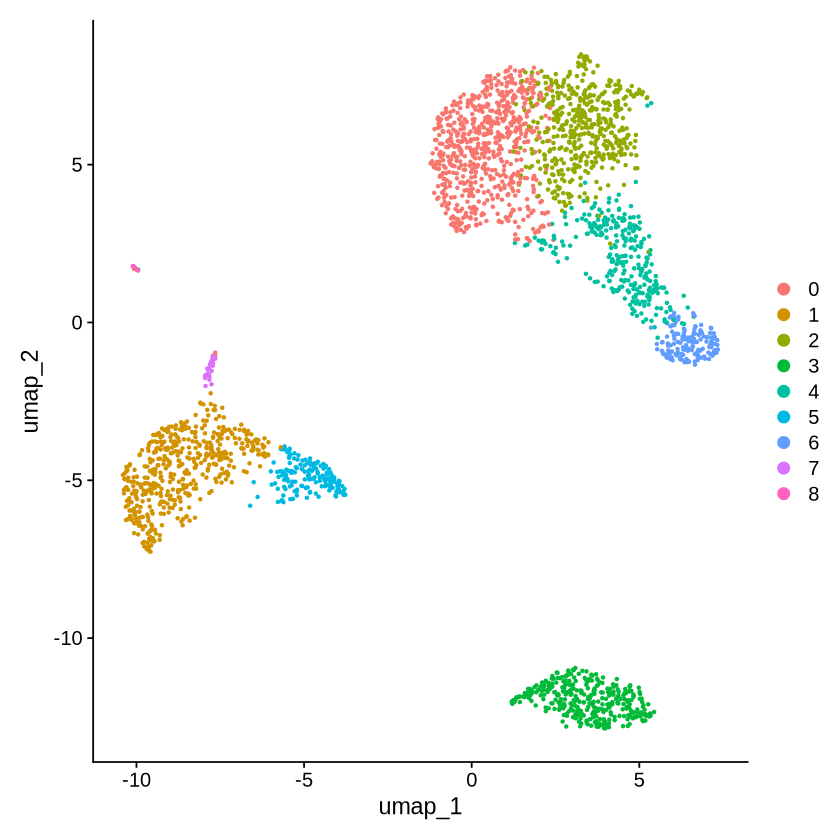

In [15]:
# UMAP
pbmc <- RunUMAP(pbmc, dims = 1:10)
DimPlot(pbmc, reduction = 'umap')


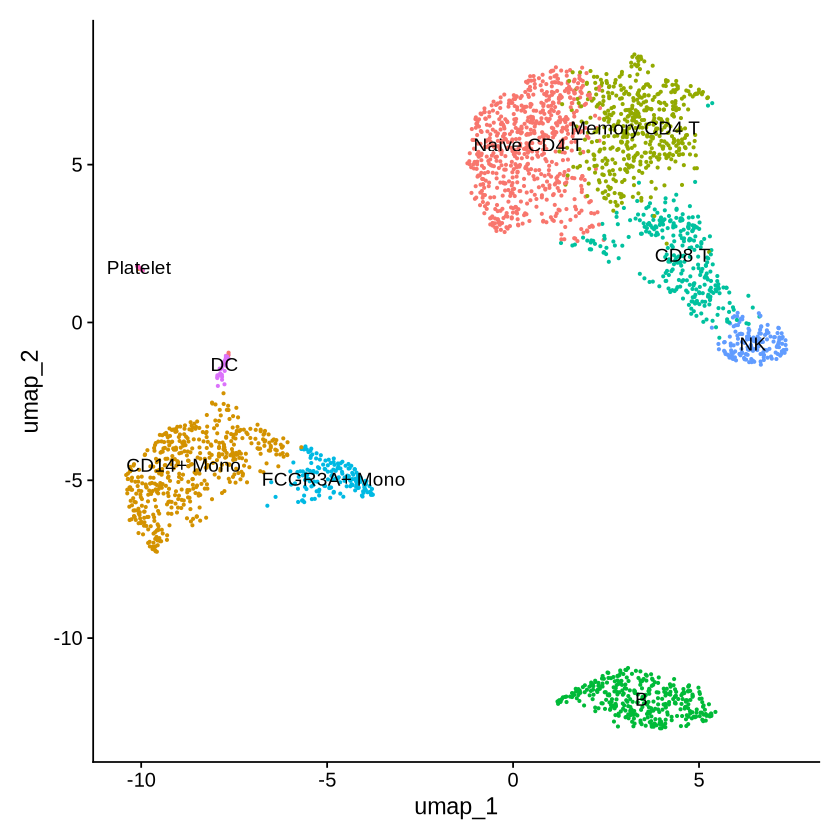

In [16]:
# Cell type assignment
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono", "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = 'umap', label = TRUE, pt.size = 0.5) + NoLegend()


## Venn diagram / Sankey diagram

In [22]:
# Prepare clustering data
cluster_comparison_df <- data.frame(
  cell_id = rownames(pbmc_hgc@meta.data),
  method_A = pbmc_hgc$HGC_clusters,
  method_B = pbmc$seurat_clusters
)

In [23]:
# Contingency table
overlap_matrix <- table(method_A = cluster_comparison_df$method_A,
                        method_B = cluster_comparison_df$method_B)


In [24]:
head(overlap_matrix)

        method_B
method_A   0   1   2   3   4   5   6   7   8
       1  12   0 396   0   5   0   0   0   0
       2   0   0   0 344   0   0   0   0   0
       3   0 478   0   0   0   9   0   2   0
       4   0   0   0   0  11   0 153   0   0
       5 111   0  17   0 275   0   2   0   0
       6   0   3   0   0   0 153   0   0   0

In [25]:
# Sankey diagram preparation
sankey_data <- cluster_comparison_df %>%
  group_by(method_A, method_B) %>%
  summarise(cell_count = n(), .groups = "drop")


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


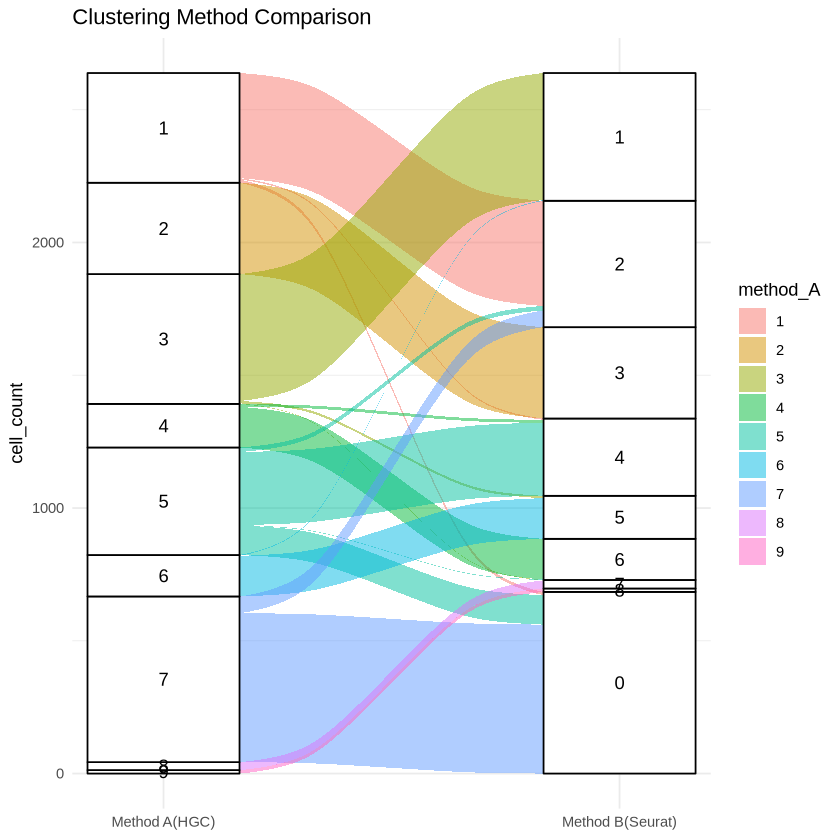

In [27]:
# Sankey Diagram
sankey_plot <- ggplot(sankey_data,
       aes(y = cell_count,
           axis1 = method_A,
           axis2 = method_B)) +
  geom_alluvium(aes(fill = method_A)) +
  geom_stratum() +
  geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
  scale_x_discrete(limits = c("Method A(HGC)", "Method B(Seurat)"),
                   expand = c(0.1, 0.1)) +
  theme_minimal() +
  labs(title = "Clustering Method Comparison")

print(sankey_plot)

## venn plot

In [54]:
# Step 1: Prepare the list of unique cell IDs for each cluster by both methods
method_A_clusters <- cluster_comparison_df %>%
  group_by(method_A, cell_id) %>%
  summarise() %>%
  group_by(method_A) %>%
  summarise(cells = list(cell_id)) %>%
  pull(cells)

names(method_A_clusters) <- unique(cluster_comparison_df$method_A)

method_B_clusters <- cluster_comparison_df %>%
  group_by(method_B, cell_id) %>%
  summarise() %>%
  group_by(method_B) %>%
  summarise(cells = list(cell_id)) %>%
  pull(cells)

names(method_B_clusters) <- unique(cluster_comparison_df$method_B)

`summarise()` has grouped output by 'method_A'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'method_B'. You can override using the `.groups` argument.


In [55]:
# Step 2: Create lists of unique cell IDs for each method and cluster pair
venn_data <- list()

# Check clusters in both methods
for (a_cluster in names(method_A_clusters)) {
  for (b_cluster in names(method_B_clusters)) {
    # Find overlap between method_A and method_B clusters
    overlap_cells <- intersect(method_A_clusters[[a_cluster]], method_B_clusters[[b_cluster]])

    # Only add overlap if it's non-empty
    if (length(overlap_cells) > 0) {
      # We use a set notation for each cluster pair
      venn_data[[paste(a_cluster, b_cluster, sep = "_")]] <- overlap_cells
    }
  }
}

# Check if venn_data contains valid sets
if (length(venn_data) == 0) {
  stop("No overlaps found between clusters. Please check your input data.")
}


In [57]:
# Step 3: Create the Venn diagram using VennDiagram

# Check the number of sets in venn_data
num_sets <- length(venn_data)

# Limit the number of sets to 5 for VennDiagram
if (num_sets > 5) {
  # Select top 5 sets with the largest overlaps
  venn_data <- venn_data[order(sapply(venn_data, length), decreasing = TRUE)][1:5]
  warning("More than 5 overlapping sets detected. Displaying Venn diagram for the top 5 sets only.")
}

# Check if venn_data is still empty after potential filtering
if (length(venn_data) == 0) {
  stop("No overlaps found between clusters. Please check your input data.")
}

# Create the Venn diagram with appropriate parameters based on the number of sets
venn_plot <- venn.diagram(
  x = venn_data,
  category.names = names(venn_data),  # Use the names of the clusters
  filename = NULL,  # Don't save to file, display directly
  output = F,
  scaled = TRUE,
  fill = rainbow(length(venn_data)),  # Use a different color for each overlap
  alpha = 0.5,
  label.col = "black",
  cex = 1.5,
  fontface = "bold",
  cat.cex = 1.5,
  cat.fontface = "bold",
  # Adjust category positions based on number of sets
  cat.pos = switch(
    as.character(length(venn_data)),
    "2" = c(-45, 45),
    "3" = c(0, 135, -135),
    "4" = c(-45, 45, 135, -135),
    "5" = c(0, -135, 135, 45, -45), # Example for 5 sets, adjust as needed
    c(0, 0, 0, 0, 0) # Default to 0 if more than 5 sets (after filtering)
  )
)

Warning message:
“More than 5 overlapping sets detected. Displaying Venn diagram for the top 5 sets only.”


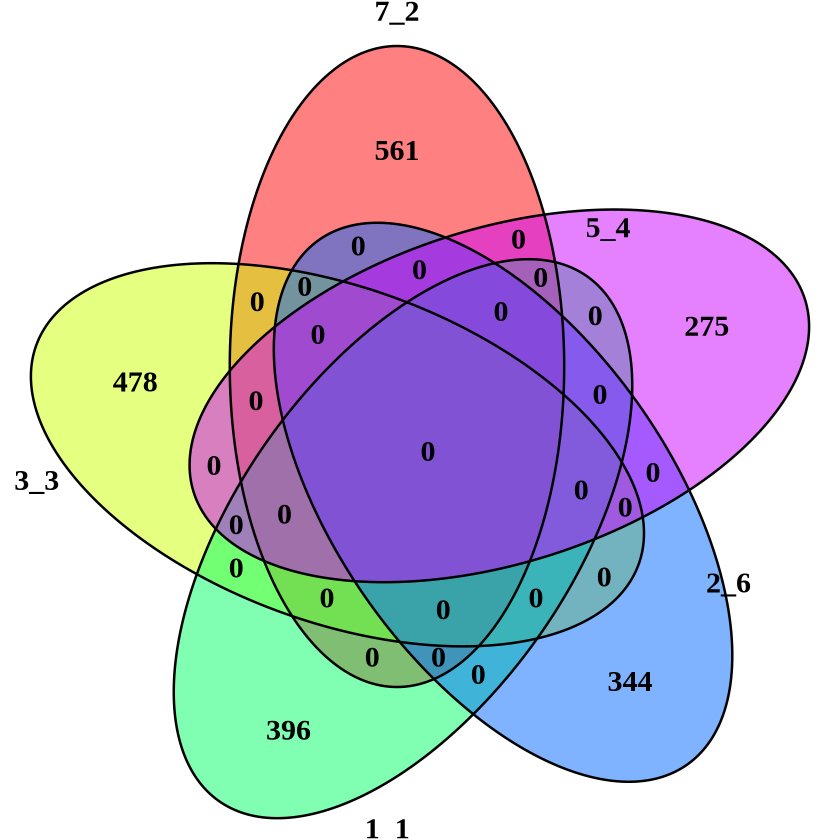

In [59]:
# Display the Venn diagram
grid.draw(venn_plot)

That looks really bad ...

## use UpSetR

In [63]:
# Step 2: Create lists of unique cell IDs for each method and cluster pair
venn_data <- list()

# Check clusters in both methods
for (a_cluster in names(method_A_clusters)) {
  for (b_cluster in names(method_B_clusters)) {
    # Find overlap between method_A and method_B clusters
    overlap_cells <- intersect(method_A_clusters[[a_cluster]], method_B_clusters[[b_cluster]])

    # Only add overlap if it's non-empty
    if (length(overlap_cells) > 0) {
      # We use a set notation for each cluster pair
      venn_data[[paste(a_cluster, b_cluster, sep = "_")]] <- overlap_cells
    }
  }
}

# Check if venn_data contains valid sets
if (length(venn_data) == 0) {
  stop("No overlaps found between clusters. Please check your input data.")
}


In [67]:
length(names(venn_data))

[1] 19

In [64]:
# Create a list of sets for UpSetR
upset_data <- fromList(venn_data)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


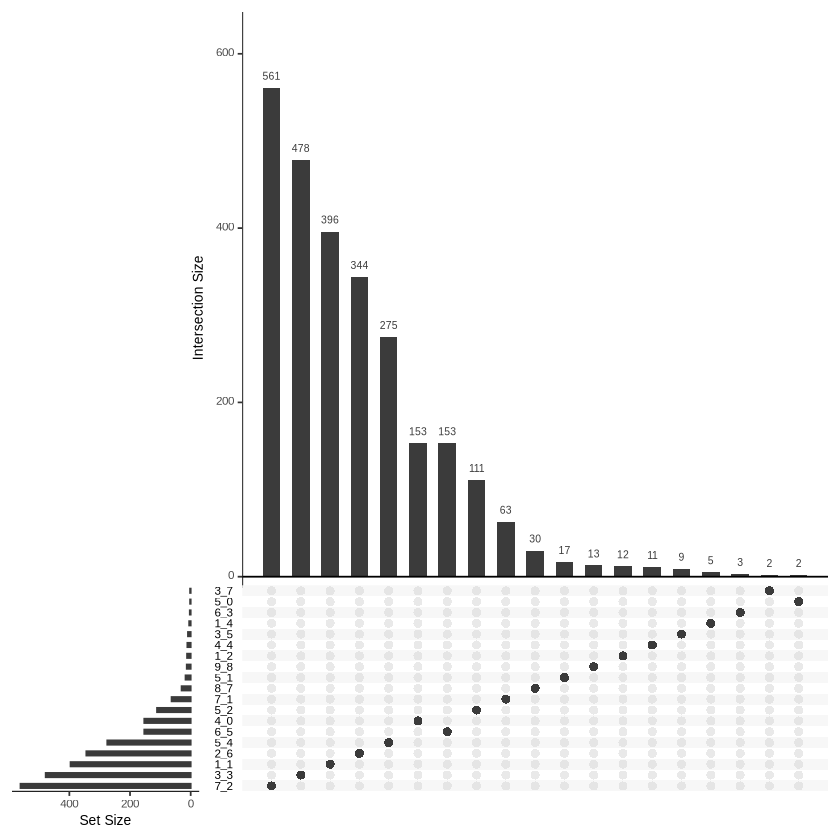

In [65]:
# Generate UpSet plot
upset(upset_data, nsets = num_sets, order.by = "freq")

## metrics

In [40]:
# Direct metrics calculation using existing dataframe
comparison_metrics <- list(
  # aricode metrics
  ARI = aricode::ARI(cluster_comparison_df$method_A, cluster_comparison_df$method_B),
  MARI = aricode::MARI(cluster_comparison_df$method_A, cluster_comparison_df$method_B),
  NMI = aricode::NMI(cluster_comparison_df$method_A, cluster_comparison_df$method_B),
  AMI = aricode::AMI(cluster_comparison_df$method_A, cluster_comparison_df$method_B),
  NVI = aricode::NVI(cluster_comparison_df$method_A, cluster_comparison_df$method_B),
  RI = aricode::RI(cluster_comparison_df$method_A, cluster_comparison_df$method_B),
  NID = aricode::NID(cluster_comparison_df$method_A, cluster_comparison_df$method_B),

  # Ensure numeric conversion to avoid potential NA
  rand_index = fossil::rand.index(as.numeric(cluster_comparison_df$method_A),
                                  as.numeric(cluster_comparison_df$method_B)),
  adjusted_rand_index = fossil::adj.rand.index(cluster_comparison_df$method_A,
                                               cluster_comparison_df$method_B)
)


In [41]:
# Print results
print(comparison_metrics)

$ARI
[1] 0.7941971

$MARI
[1] 0.7942046

$NMI
[1] 0.8491812

$AMI
[1] 0.8481951

$NVI
[1] 0.2558907

$RI
[1] 0.9430269

$NID
[1] 0.1508188

$rand_index
[1] 0.9430269

$adjusted_rand_index
[1] 0.9108564

